In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv('bikeshare.csv')
data.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
data.shape

(17379, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weather     17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  humidity    17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  demand      17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
data.describe()

,index,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
data.isnull().sum()

index         0
date          0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
demand        0
dtype: int64

In [7]:
data=data.drop(['index','date'],axis=1)
data.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


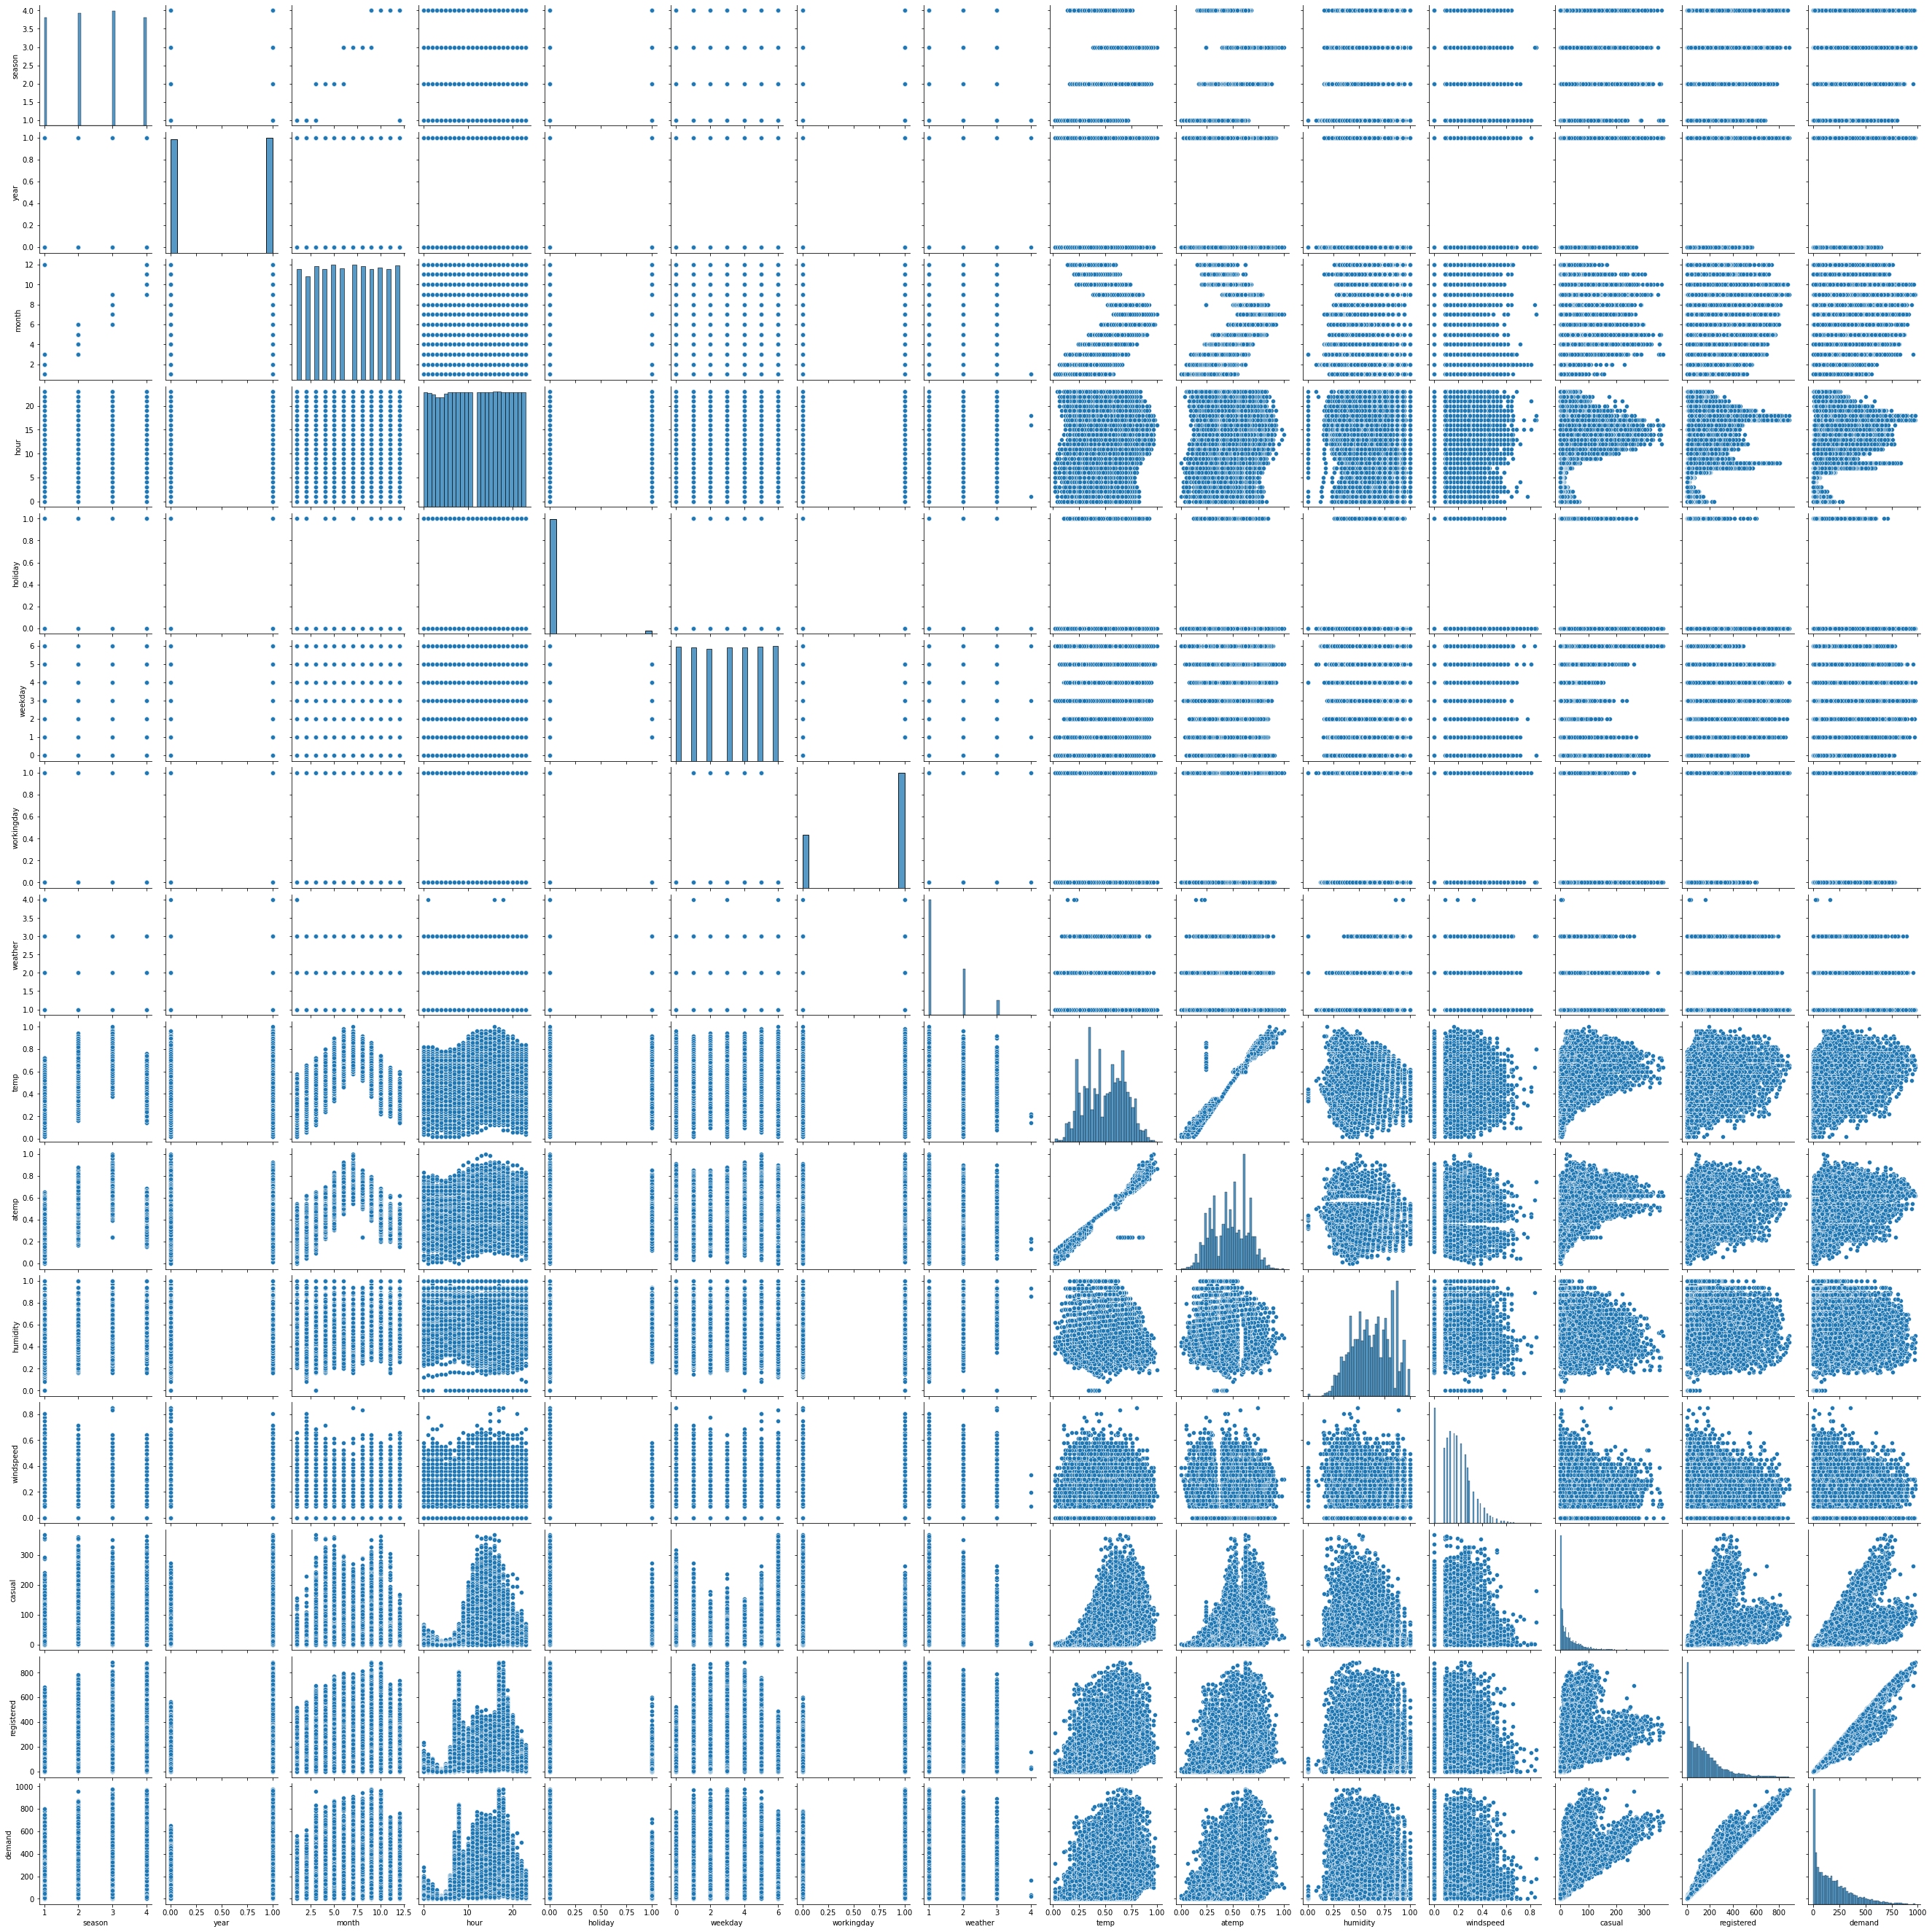

In [8]:
sns.pairplot(data)
plt.show()

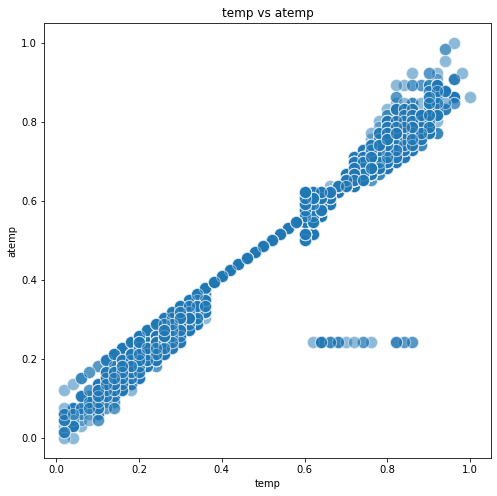

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(x='temp',y='atemp',data=data,s=150,alpha=0.5,edgecolor='white')
plt.xlabel('temp')
plt.ylabel('atemp')
plt.title('temp vs atemp')
plt.show()

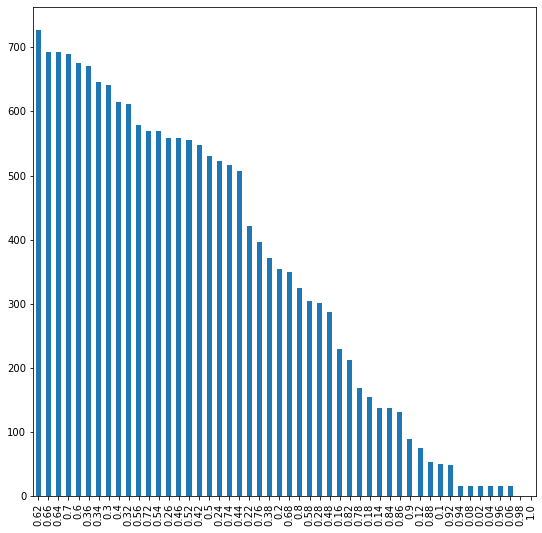

In [10]:
plt.figure(figsize=(9,9))
data['temp'].value_counts().plot.bar()
plt.xticks(rotation=90)
plt.show()

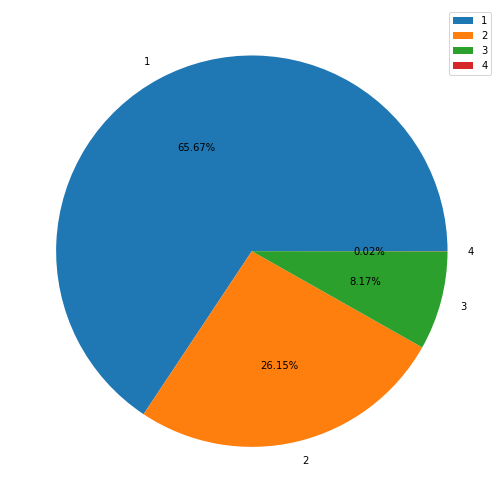

In [11]:
data['weather'].value_counts()

plt.figure(figsize=(9,9))
mylabels=(data['weather'].value_counts().index)
plt.pie(data['weather'].value_counts(),labels=mylabels,autopct='%1.2f%%')
plt.legend(loc='best')
plt.show()



In [12]:
x=data.drop('demand',axis=1)
y=data['demand']

## Kfold

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [18]:
kfold=KFold(n_splits=10)
le=LinearRegression()
results=cross_val_score(le,x,y,cv=kfold)
print(results)
print('Results',results.mean())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Results 1.0


## Linear Regression

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=99)

In [16]:
x_train.shape

(13903, 14)

In [17]:
x_test.shape

(3476, 14)

In [20]:
le.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred=le.predict(x_test)
y_pred

array([102., 105., 225., ..., 267., 178., 103.])

In [23]:
from sklearn.metrics import r2_score
print('Accuracy_score',r2_score(y_test,y_pred))

Accuracy_score 1.0


## Decision Tree Regressor

In [25]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [26]:
y_pred=dtr.predict(x_test)
y_pred

array([101., 102., 228., ..., 264., 180., 104.])

In [27]:
from sklearn.metrics import r2_score
print('Accuracy_score',r2_score(y_test,y_pred))

Accuracy_score 0.9991584631136501


##  Random Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [29]:
y_pred=rfr.predict(x_test)
y_pred

array([101.39, 104.99, 226.07, ..., 267.35, 178.64, 103.9 ])

In [30]:
from sklearn.metrics import r2_score
print('Accuracy_score',r2_score(y_test,y_pred))

Accuracy_score 0.9998245365046933


In [34]:
data1=x.iloc[1:2,:]
data1

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0.0,8,32


In [36]:
predict=rfr.predict(data1)
predict

array([39.88])